In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
data = pd.read_csv('../data/diamonds_train.csv')

In [4]:
data.head()

carat        cut color clarity  depth  table  price     x     y     z
0   1.21    Premium     J     VS2   62.4   58.0   4268  6.83  6.79  4.25
1   0.32  Very Good     H     VS2   63.0   57.0    505  4.35  4.38  2.75
2   0.71       Fair     G     VS1   65.5   55.0   2686  5.62  5.53  3.65
3   0.41       Good     D     SI1   63.8   56.0    738  4.68  4.72  3.00
4   1.02      Ideal     G     SI1   60.5   59.0   4882  6.55  6.51  3.95

In [5]:
data.shape

(40455, 10)

In [9]:
x_filter = data['x']==0
y_filter = data['y']==0
z_filter = data['z']==0

data.drop(data[(x_filter | y_filter | z_filter)].index, inplace=True)

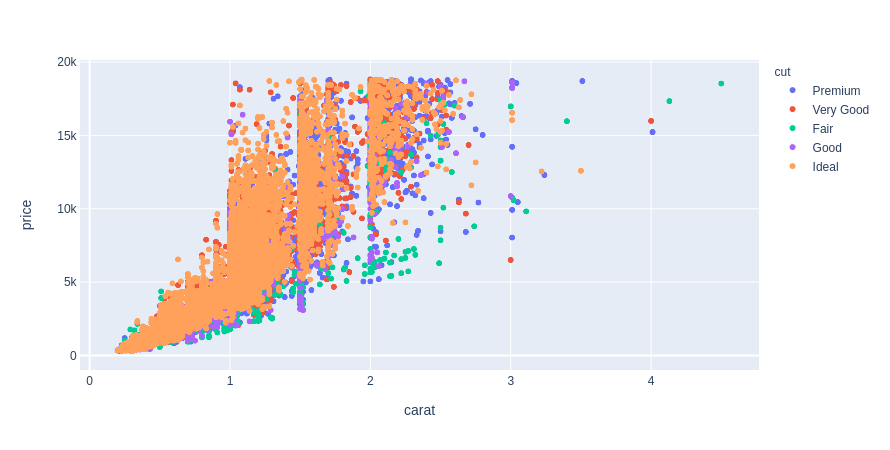

In [24]:
px.scatter(data, x='carat', y='price', color='cut')

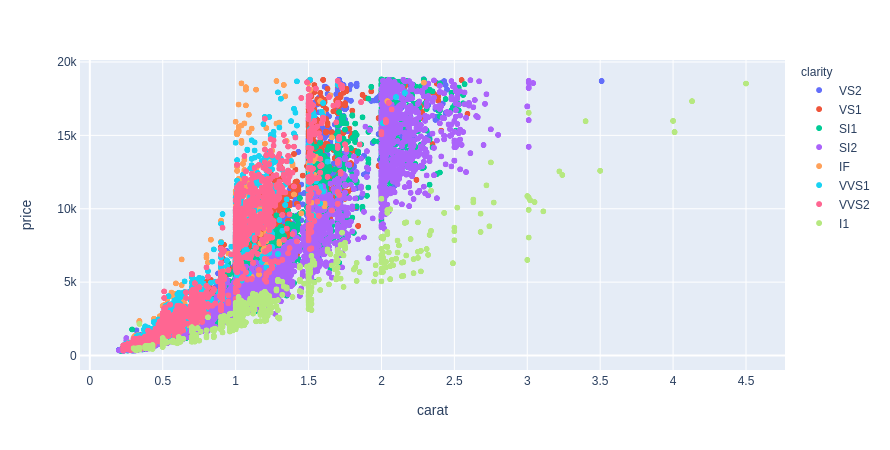

In [25]:
px.scatter(data, x='carat', y='price', color='clarity')

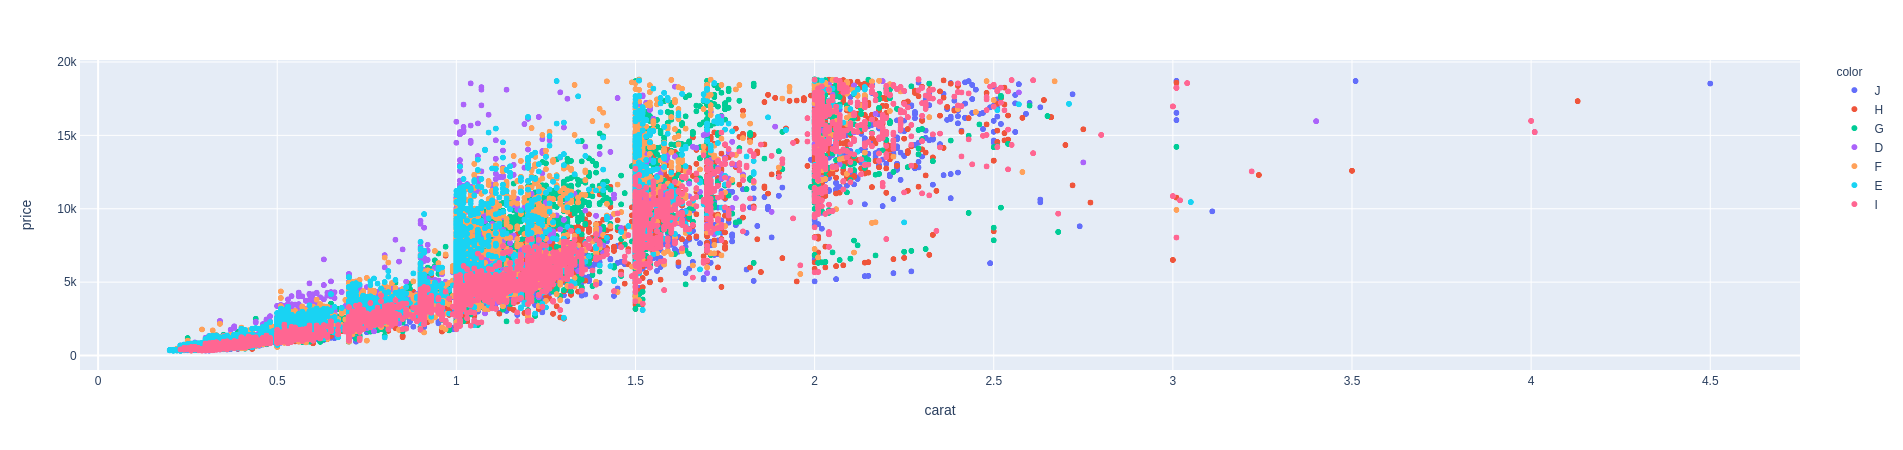

In [26]:
px.scatter(data, x='carat', y='price', color='color')

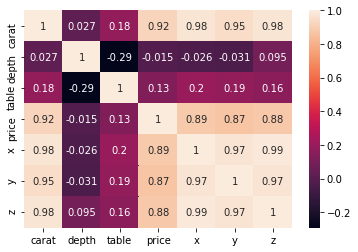

In [31]:
sns.heatmap(data.corr(), annot=True)

In [118]:
cut_color = data[['color', 'cut', 'price']].pivot_table(index='color', columns='cut', aggfunc='mean')
cut_color.columns = cut_color.columns.droplevel(0)
cut_color = cut_color[['Fair', 'Good', 'Very Good', 'Ideal', 'Premium']]

In [126]:
cut_clarity = data[['clarity', 'cut', 'price']].pivot_table(index='clarity', columns='cut', aggfunc='mean')
cut_clarity.columns = cut_clarity.columns.droplevel(0)
cut_clarity.reindex(['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'])
cut_clarity = cut_clarity[['Fair', 'Good', 'Very Good', 'Ideal', 'Premium']]

In [129]:
color_clarity = data[['clarity', 'color', 'price']].pivot_table(index='color', columns='clarity', aggfunc='mean')
color_clarity.columns = color_clarity.columns.droplevel(0)
color_clarity = color_clarity[['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']]

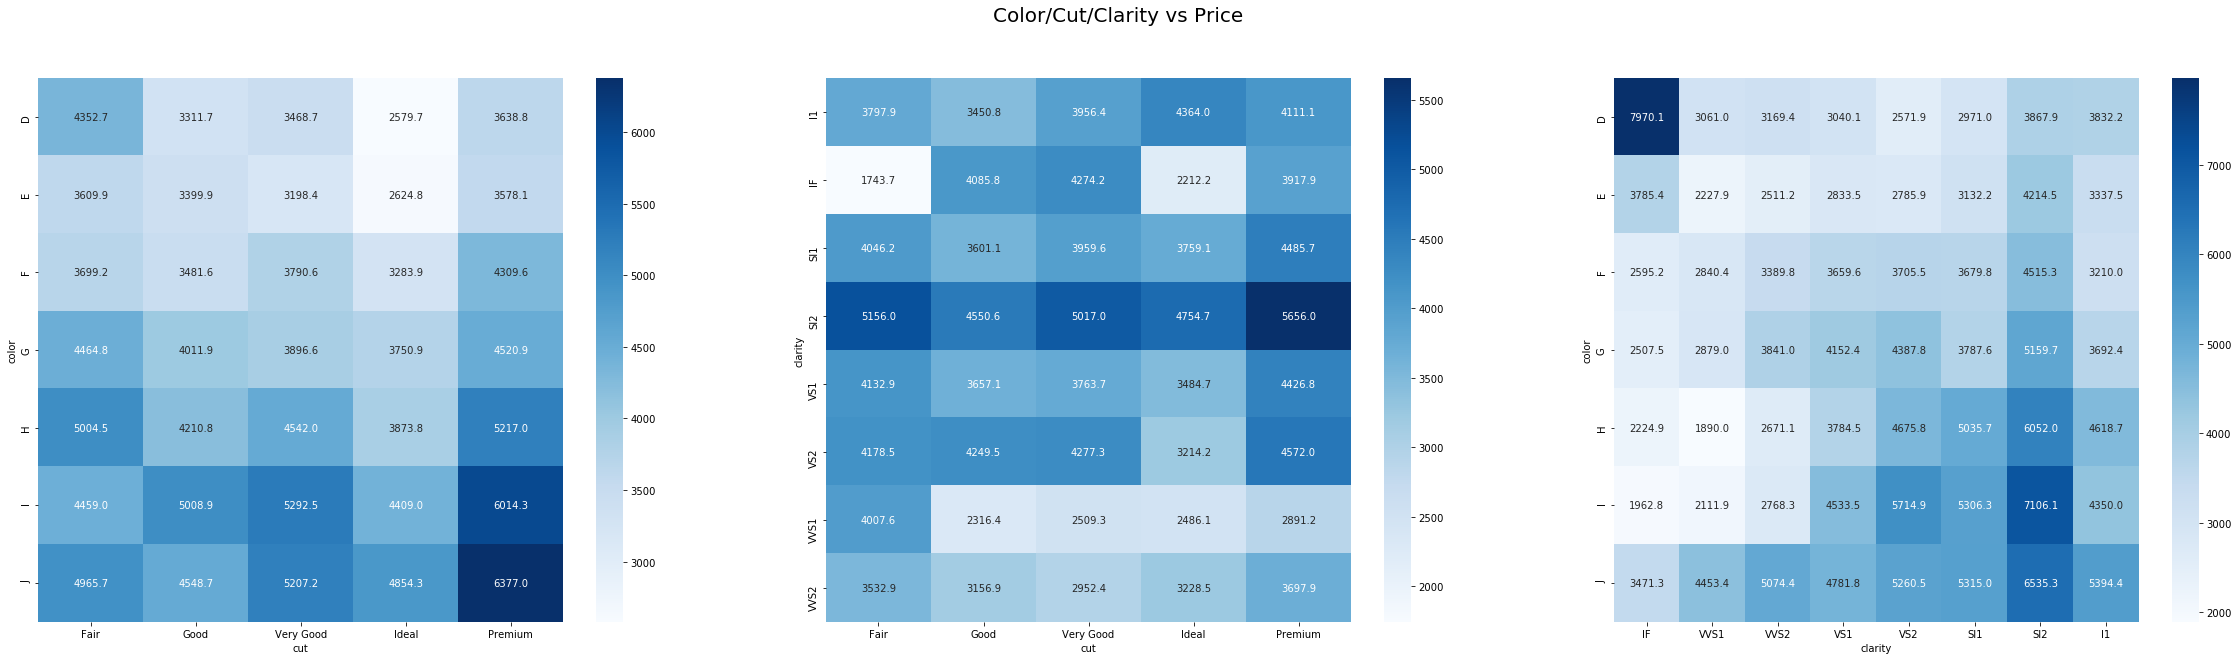

In [181]:
fig, axes = plt.subplots(ncols=3, nrows =1, figsize = (40,10))
fig.suptitle('Color/Cut/Clarity vs Price', fontsize= 20)

sns.heatmap(cut_color, annot=True, fmt='.1f', ax=axes[0], cmap='Blues')
sns.heatmap(cut_clarity, annot=True, fmt='.1f', ax=axes[1], cmap='Blues')
sns.heatmap(color_clarity, annot=True, fmt='.1f', ax=axes[2], cmap='Blues');

In [183]:
carat_color = data[['color', 'carat', 'price']].pivot_table(index='color', columns='carat', aggfunc='mean')
carat_color.columns = carat_color.columns.droplevel(0)
# carat_color = cut_color[['Fair', 'Good', 'Very Good', 'Ideal', 'Premium']]

carat_color

carat   0.20   0.21   0.22        0.23        0.24        0.25        0.26  \
color                                                                        
D      367.0  386.0  404.0  504.939394  520.476190  496.277778  567.428571   
E      361.5  375.6  370.5  497.172043  504.619048  577.211538  598.600000   
F        NaN    NaN  406.0  489.296296  520.107692  584.058824  564.755102   
G        NaN    NaN    NaN  457.800000  492.588235  517.720000  498.925926   
H        NaN    NaN    NaN  420.166667  474.000000  467.937500  489.852941   
I        NaN    NaN    NaN  414.000000  446.000000  468.333333  445.333333   
J        NaN    NaN    NaN  340.000000  432.000000         NaN         NaN   

carat        0.27        0.28        0.29  ...    3.11     3.22     3.24  \
color                                      ...                             
D      623.190476  633.200000  643.200000  ...     NaN      NaN      NaN   
E      593.646154  616.480000  643.238095  ...     NaN      NaN      NaN   
F      632.272727  619.416667  684.608696  ...     NaN      NaN      NaN   
G      522.000000  513.875000  577.322581  ...     NaN      NaN      NaN   
H      492.111111  499.846154  535.200000  ...     NaN      NaN  12300.0   
I      467.923077  461.000000  397.750000  ...     NaN  12545.0      NaN   
J      443.000000  375.000000         NaN  ...  9823.0      NaN      NaN   

carat     3.40     3.50     3.51     4.00     4.01     4.13     4.50  
color                                                                 
D      15964.0      NaN      NaN      NaN      NaN      NaN      NaN  
E          NaN      NaN      NaN      NaN      NaN      NaN      NaN  
F          NaN      NaN      NaN      NaN      NaN      NaN      NaN  
G          NaN      NaN      NaN      NaN      NaN      NaN      NaN  
H          NaN  12587.0      NaN      NaN      NaN  17329.0      NaN  
I          NaN      NaN      NaN  15984.0  15223.0      NaN      NaN  
J          NaN      NaN  18701.0      NaN  15223.0      NaN  18531.0  

[7 rows x 270 columns]